# Spatiotemporal variability in phytoplankton community composition in

Great Bay Estuary

Final Project for BIOL806, Fall 2024

Hannah Gossner [](https://orcid.org/0000-0001-9581-1110) (University of New Hampshire)  
December 4, 2024

Phytoplankton, as the base of the food chain, are an important but highly variable source of nutrients for filter feeding bivalves. While considerable work has been done to map interannual phytoplankton community composition in the Gulf of Maine, less has been done in New Hampshire’s Great Bay, an area with a growing shellfish aquaculture sector. This project utilizes a weekly time series of Flowcam imagery to examine changes in community composition on both an annual and interannual time scale from two locations in the Great Bay estuary. Overall, this work highlights new ways to use high-throughput instrumentation to better understand phytoplankton community dynamics.

# Introduction

Phytoplankton, as the base of the food chain, are an important but highly variable source of nutrients for filter feeders, including ecologically and commercially valuable bivalves. This variation arises from multiple factors including interspecies differences in nutritional content \[@whyte1987; @menden-deuer2000\], bivalve feeding strategy (selective vs. generalist) \[@shumway1985; @cognie2003; @evanward2004; @beninger2005; @espinosa2010\], seasonal and stochastic environmental triggers for phytoplankton germination and reproduction \[@glover1985; @thompson1993; @pinckney1997; @kremp2000; @moore2008; @montresor2013\], and systemic shifts in environmental parameters due to climate change \[@sommer2008; @beardall2009; @winder2012; @barton2016; @henson2021\].

While considerable work has been done to map interannual phytoplankton community composition in the Gulf of Maine \[@thomas2003; @moore2008; @kane2011; @record2019; @zang2021\] , less has been done in New Hampshire’s Great Bay, an area with a growing shellfish aquaculture sector. The Great Bay is a well-mixed estuarine system with multiple riverine inputs. While this system has high connectivity to the Gulf of Maine, as an estuary with multiple riverine inputs, the drivers of phytoplankton community composition in estuaries are markedly different\[@pinckney1997; @liu2015; @liu2018\] and regional understanding of both seasonal cycles and future predictions is likely not fully accurate.

In order to better understand the local phytoplankton community and therefore their nutritional availability of commercially valuable bivalves, this project utilizes a weekly time series of Flowcam imagery to examine changes in community composition on both an annual and interannual time scale from two locations in the Great Bay estuary. Refinement of this data pipeline will allow us to see in nearly real time what changes are occurring within the local phytoplankton community in order to provide more timely information on harmful algal species and nutritional availability to both managers and shellfish aquaculture stakeholders.

# Methods

Data was collected weekly at multiple sites throughout the Great Bay Estuary and the New Hampshire Seacoast starting in October, 2020. Three sites (@fig-map) were focused on due to their completeness and relevance to understanding the system- Hampton (North Beach, Hampton, NH; 42.90172˚N, 70.809117˚W) University of New Hampshire (UNH) Coastal Marine Lab (CML) (New Castle, NH; 43.091613˚N, 70.710670˚W), and Jackson Estuarine Lab (JEL) (Adam’s Point, Durham, NH; 43.092114˚N, 70.864097˚W). Along with date, tide time was generally recorded. Samples taken at both CML and JEL were taken within thirty minutes before or fifteen minutes after slack high tide.

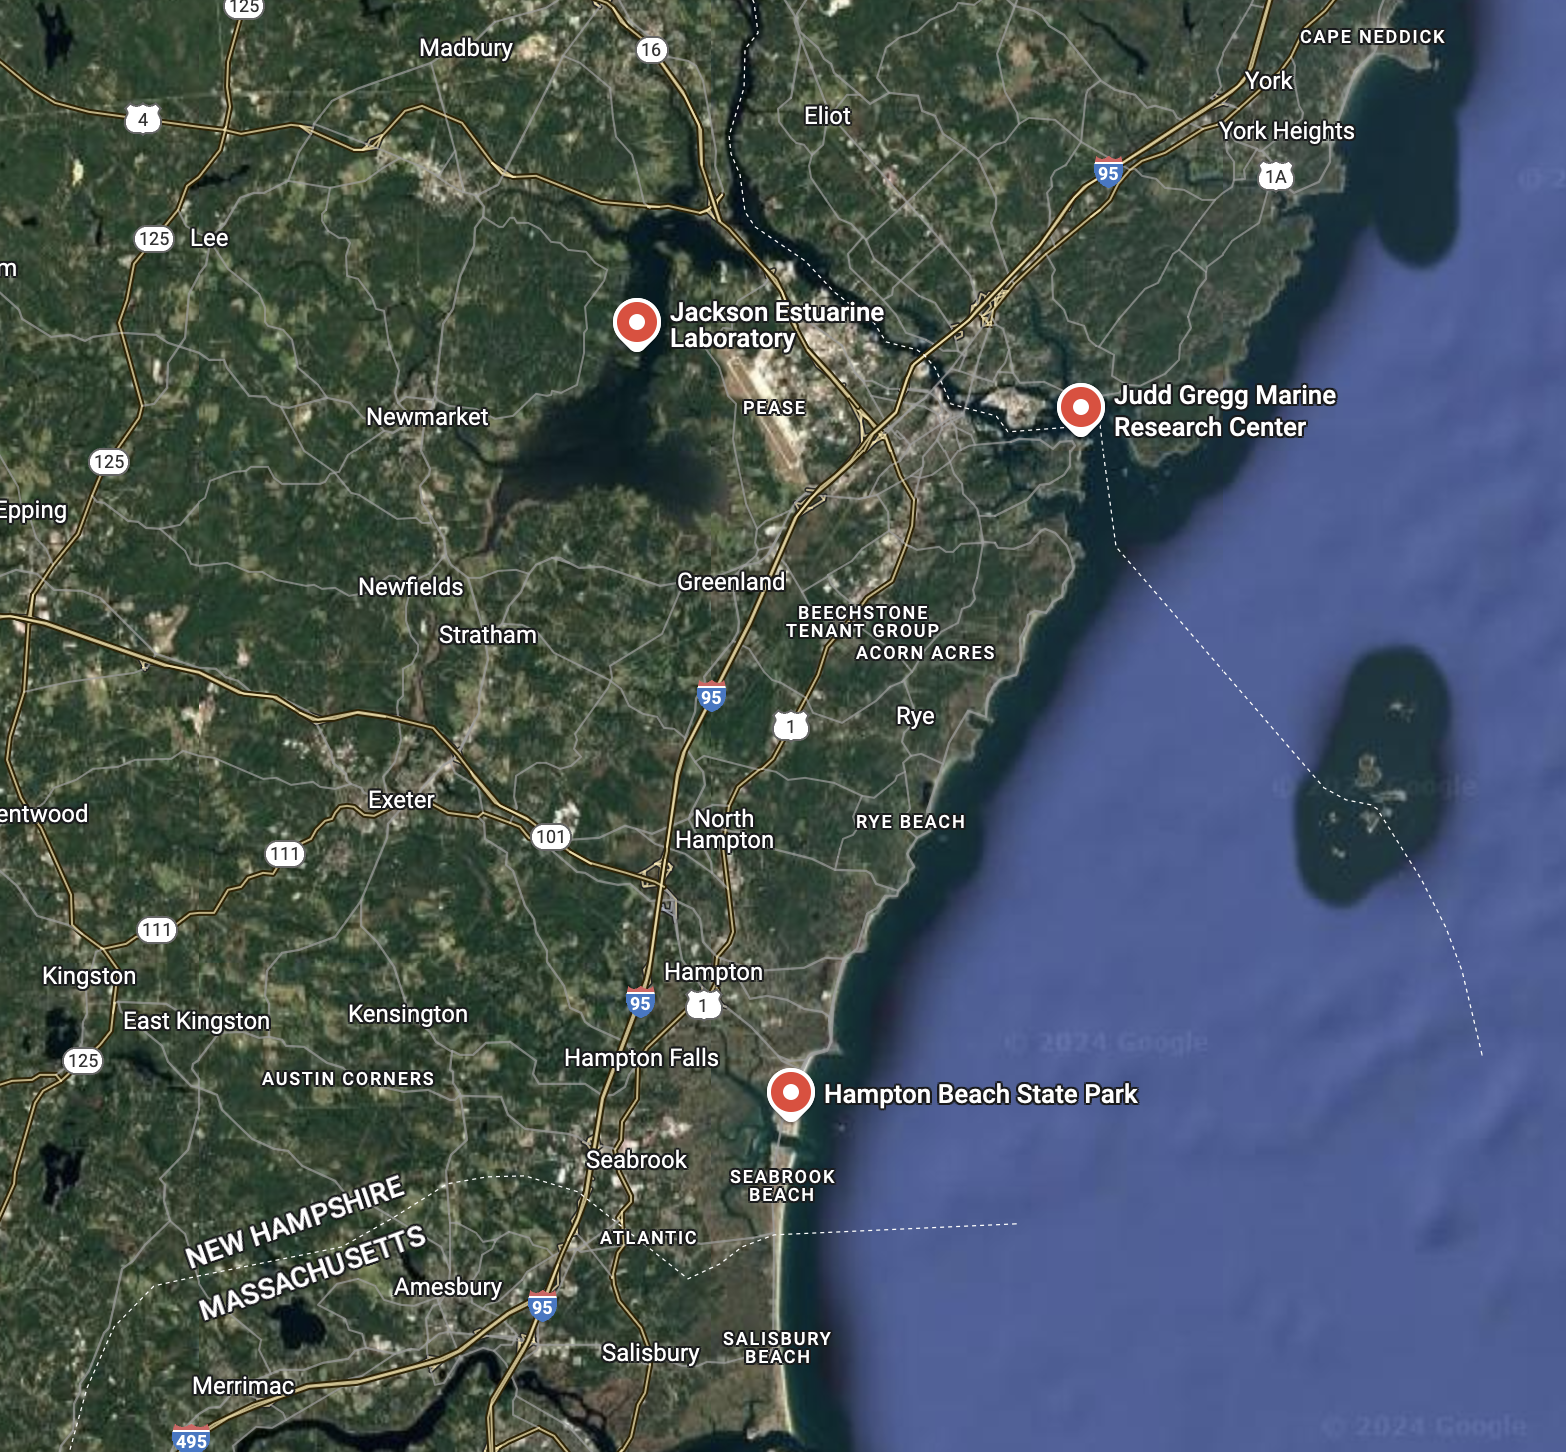{#fig-map }

Chlorophyll was measured as in @anderson2018. Briefly, 50-100mL of seawater were passed over 25mm 0.7mm GF/F filters. Filters were then placed in a 91% ethanol solution and left in the dark for 12-24 hours to extract chlorophyll, then samples were measured on a Turner AU10 fluorometer \[@jesperson1987; @graff2011\]. Samples post-2022 were corrected for phaophytin.

Triplicate 5mL sample aliquots were preserved with 0.5% glutaraldehyde, incubated at 4˚C for 10 minutes, and then stored at -80˚C until analysis (not more than 3 weeks) \[@handbook2019\]. These samples were then  analyzed for particle size distribution using flow cytometry (Guava easyCyte HT, Millipore), again based on @anderson2018 , at a low flow rate (0.24mL s<sup>-1</sup>) for three minutes to acquire cell counts for picoeukaryotes, nanoeukaryotes, and cyanobacteria. These three groups were identified based on the relationship between forward scatter vs. orange or red florescence signals \[@worden2003\].

An additional portion of the sample (100-200mL, preserved in 1% formalin) was run through a FlowCam (Model 8100-C, Yokogawa Fluid Imaging technologies, Maine, USA) in order to capture data on the larger cells (20-200mm). Before scanning, samples were filtered through 200mm mesh to remove the particles outside the size-range of interest. Triplicate 5-10mL samples were run on Autoimage mode at 4x magnification through a 300mm flow cell at 2 mL min<sup>-1</sup>. Data was processed using in-built software Visual Spreadsheet 6 to separate out individual particle vignettes and associated data describing size, color, transparency, and symmetry.

All data processing was done using R v. 4.4.0 (R Core Team, 2020). A subset of the time series was selected for analysis based on completeness of data ranging from May 2023 through October 2024. First, the relationship between chlorophyll levels and cell count from both the flow cytometer and the Flowcam were examined visually, considering differences both by location and cell size. Simple linear regressions were built internally to ggplot2 (@ggplot2) using the geom_smooth function, and equations were estimated and printed using ggpmisc (@ggpmisc) function stat_poly_eq. Next, a PCA was conducted on the Flowcam data using FactoMineR and factoextra to assess potential groupings and effect sizes of parameters included in the output \[@factoextra; @FactoMineR\]. An exploratory heatmap of parameter correlations was created using package pheatmap (@pheatmap). Lastly, a generalized linear model was fit to the data to determine which phytoplankton image parameters best track chlorophyll concentration.

# Results

In [ ]:
## Call required packages
require(dplyr)

Loading required package: dplyr


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: ggpmisc
Loading required package: ggpp
Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: MetBrewer

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

  Day_Pull Month_Pull Year Tide_Time Location Sample_. Vol_Ex.mL. Vol_Fill.mL.
1        2          1 2024      3:23    HHHR2        2          5          100
2        2          1 2024      3:23    HHHR2        3          5          100
3        3          1 2024     16:19      CML        1          5          100
4        3          1 2024     16:19      CML        2          5          100
5        3          1 2024     16:19      CML        3          5          100
6        3          1 2024     17:58      JEL        1          5          100
      Fo    Fa Chlorophyll..ug.L. Picoeukaryotes..cells.ml.
1 101.10 68.13          1.8935594                      <NA>
2 103.70 68.55          2.0187629                      <NA>
3  27.12 20.04          0.4066242                  3.24E+03
4  28.54 21.04          0.4307460                  1.67E+03
5  30.73 22.06          0.4979424                  4.89E+03
6  58.29 44.43          0.7960186                  5.90E+03
  Nanoeukaryotes..cells.mL.

'data.frame':   1157 obs. of  19 variables:
 $ Day_Pull                 : int  2 2 3 3 3 3 3 3 8 8 ...
 $ Month_Pull               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Year                     : int  2024 2024 2024 2024 2024 2024 2024 2024 2024 2024 ...
 $ Tide_Time                : chr  "3:23" "3:23" "16:19" "16:19" ...
 $ Location                 : chr  "HHHR2" "HHHR2" "CML" "CML" ...
 $ Sample_.                 : chr  "2" "3" "1" "2" ...
 $ Vol_Ex.mL.               : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Vol_Fill.mL.             : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Fo                       : num  101.1 103.7 27.1 28.5 30.7 ...
 $ Fa                       : chr  "68.13" "68.55" "20.04" "21.04" ...
 $ Chlorophyll..ug.L.       : num  1.894 2.019 0.407 0.431 0.498 ...
 $ Picoeukaryotes..cells.ml.: chr  NA NA "3.24E+03" "1.67E+03" ...
 $ Nanoeukaryotes..cells.mL.: chr  NA NA "0.00E+00" "0.00E+00" ...
 $ Cyanobacteria..cells.mL. : chr  NA NA "1.14E+04" "1.67E+04" ...
 $ FlowCam   

 [1] "Day_Pull"                  "Month_Pull"               
 [3] "Year"                      "Tide_Time"                
 [5] "Location"                  "Sample_."                 
 [7] "Vol_Ex.mL."                "Vol_Fill.mL."             
 [9] "Fo"                        "Fa"                       
[11] "Chlorophyll..ug.L."        "Picoeukaryotes..cells.ml."
[13] "Nanoeukaryotes..cells.mL." "Cyanobacteria..cells.mL." 
[15] "FlowCam"                   "Nutrients"                
[17] "Flocytometer"              "DNA.mL."                  
[19] "Notes"                    

 [1] ""                                     
 [2] "1"                                    
 [3] "2"                                    
 [4] "3"                                    
 [5] "A"                                    
 [6] "B"                                    
 [7] "C"                                    
 [8] "NO SAMPLE THIS WEEK, LAB CONSTRUCTION"
 [9] "T01001"                               
[10] "T01002"                               
[11] "T01003"                               

While the general trend in chlorophyll across the three sites showed considerable variation, there did seem to be broad seasonal trends apparent (@fig-chl). There is higher overall chlorophyll present in Summer 2023 which decreases over the fall, except for a small fall bloom in October, in to the winter with a low in January 2024, before starting to rise into the spring bloom in April 2024. There is a brief drop in productivity after the bloom before chlorophyll levels increase into the summer months. The clearest trend is visible at JEL, an estuarine site. Overall, chlorophyll seems to be lower at CML on the coast than the other two sites. HAMP generally follows trends, but appears to have higher spring and fall blooms with slightly more moderate chlorophyll values relative to the season mean throughout the year.

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.

(`geom_point()`).

(`geom_line()`).

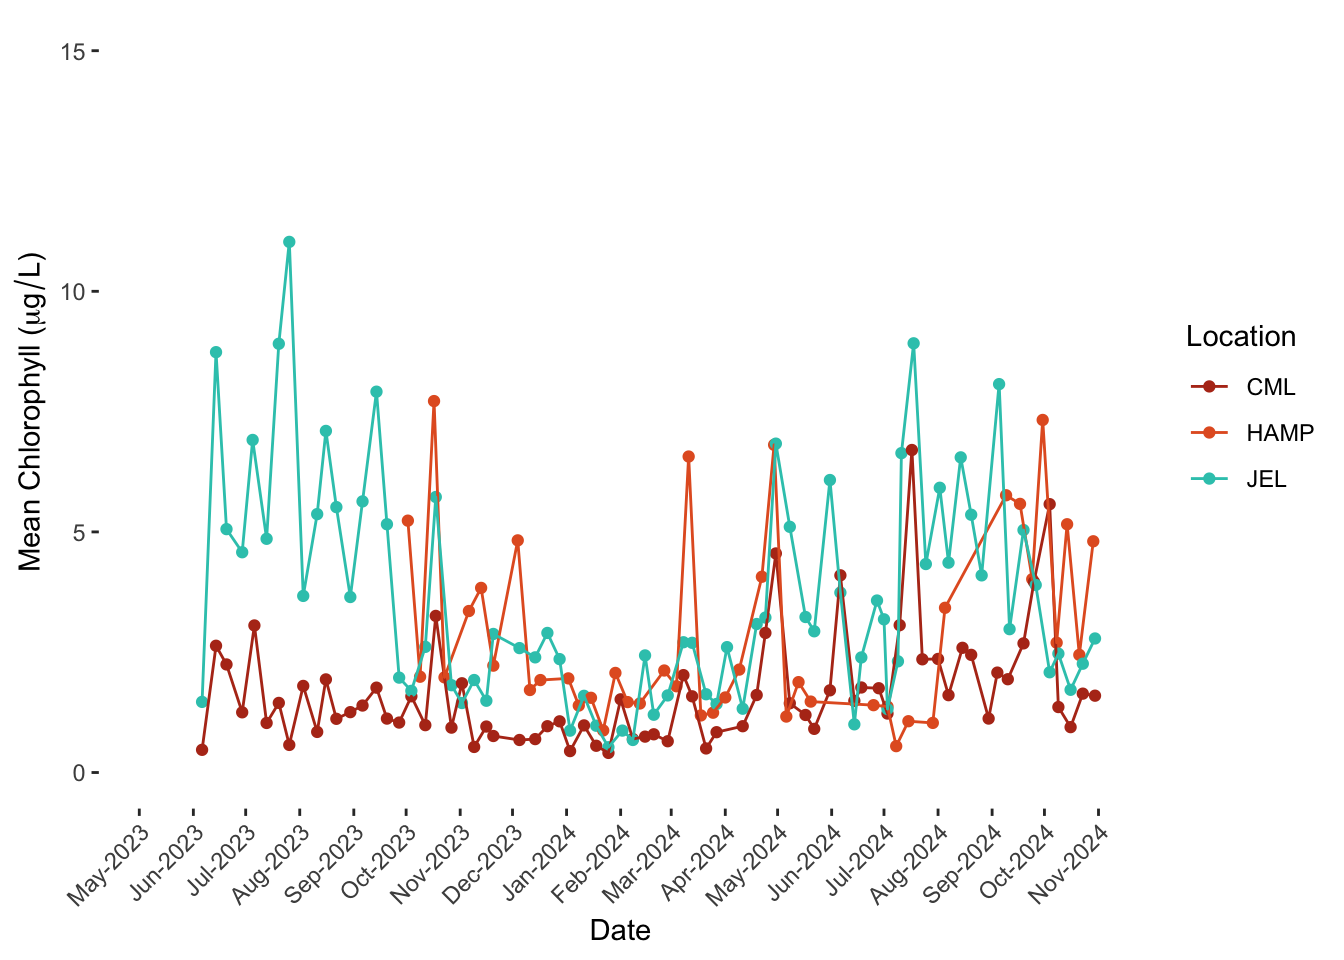

In [ ]:
# Creates a summary table to the chlorophyll measurements grouped by data and location
chl_summary<-phyto_clean %>% 
  dplyr::select(date, tide_time, location, replicate, chl) %>% 
  group_by(date, location) %>% 
  summarize(count=n(),mean_chl=mean(chl))

The distribution of cell counts separated into cyanobacteria, nanoeukaryotes, and picoeukaryotes at both CML and JEL follow similar trends over the time span (@fig-small-cells). At both sites, nanoeukaryotes had the lowest overall cell count throughout the data series with less of a seasonal trend than either of the other classes. Cyanobacteria has a moderate cell concentration year-round relative to the other two groups, with a peak in January 2024 at both sites and some evidence on increasing concentration in fall. Picoeukaryotes seem to follow a similar trend to chlorophyll concentrations with higher concentrations during summer and less in winter, although there is a sharp decrease in this size class at both locations roughly lining up with the spring bloom into summer productivity (March-June). This would suggest a lag behind total chlorophyll trends for this group.

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.

(`geom_point()`).

(`geom_line()`).

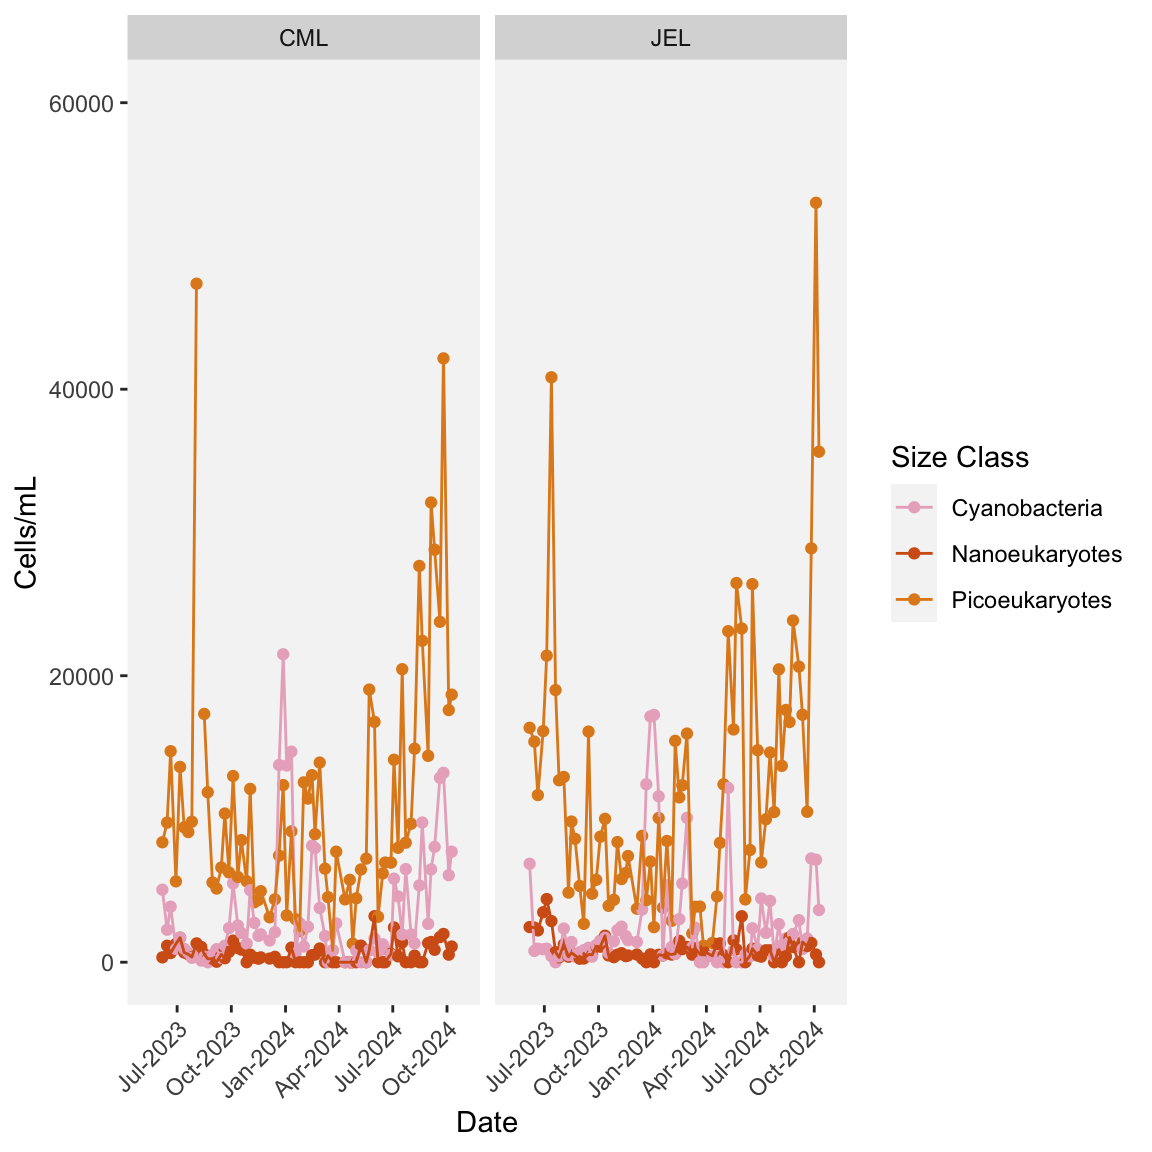

In [ ]:
# Summary table of the small cell sizes (picoeukaryote, nanoeukaryote, cyanobacteria) and associated chlorophyll measurement grouped by date and location

cellcount<-phyto_clean %>% 
  group_by(date, location) %>% 
  filter(!is.na(picoeuk)) %>% 
  summarize(count=n(), mean_chl=mean(chl), mean_pico=mean(picoeuk), mean_nano=mean(nanoeuk),
            mean_cyano=mean(cyanobac), tot_cell=(mean_pico + mean_nano + mean_cyano) )

When we map total cell counts onto chlorophyll concentrations, no apparent trend emerges (@fig-chl-to-cell-location). Linear regressions, even on log-log transformed data, can only account for an extremely small amount of the variation, even when separated by location ($\text{R}^2$=0.05 for both CML and JEL). Grouping the data by cell size (@fig-chl-to-cell-group) also reveals little to no correlation (Cyanobacteria $\text{R}^2$=0.16, nanoeukaryote $\text{R}^2$=\<0.01, picoeukaryote $\text{R}^2$=0.05). It should be noted here that this group of cells are the smallest sizes of phytoplankton.

`geom_smooth()` using formula = 'y ~ x'

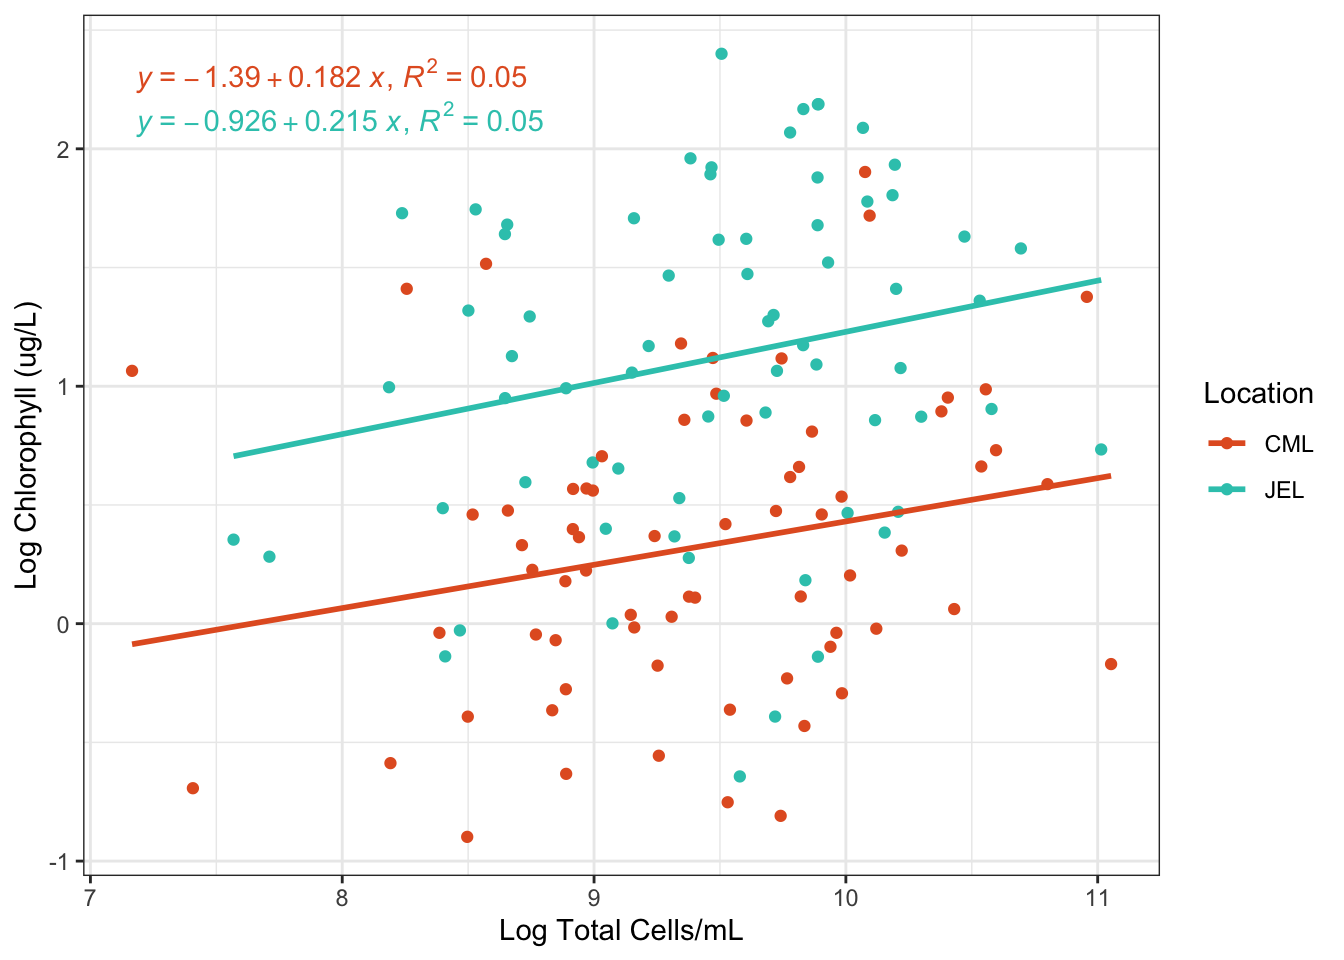

In [ ]:
#Plotting total cell count to chlorophyll relationship  by location 
chl_all_cell<-cellcount %>% 
  filter(date>"2023-05-05") %>% 
  ggplot(mapping=aes(x=log(tot_cell), y=log(mean_chl), color=location))+
  geom_point()+
  geom_smooth(method="lm", se=F)+
  stat_poly_eq(use_label(c("eq", "R2")))+
  labs(x="Log Total Cells/mL", y="Log Chlorophyll (ug/L)", color="Location")+
  scale_color_manual(values=met.brewer("Peru1",2, type="discrete"))+
  theme_bw()
chl_all_cell

`geom_smooth()` using formula = 'y ~ x'

(`stat_smooth()`).

(`stat_poly_eq()`).

(`geom_point()`).

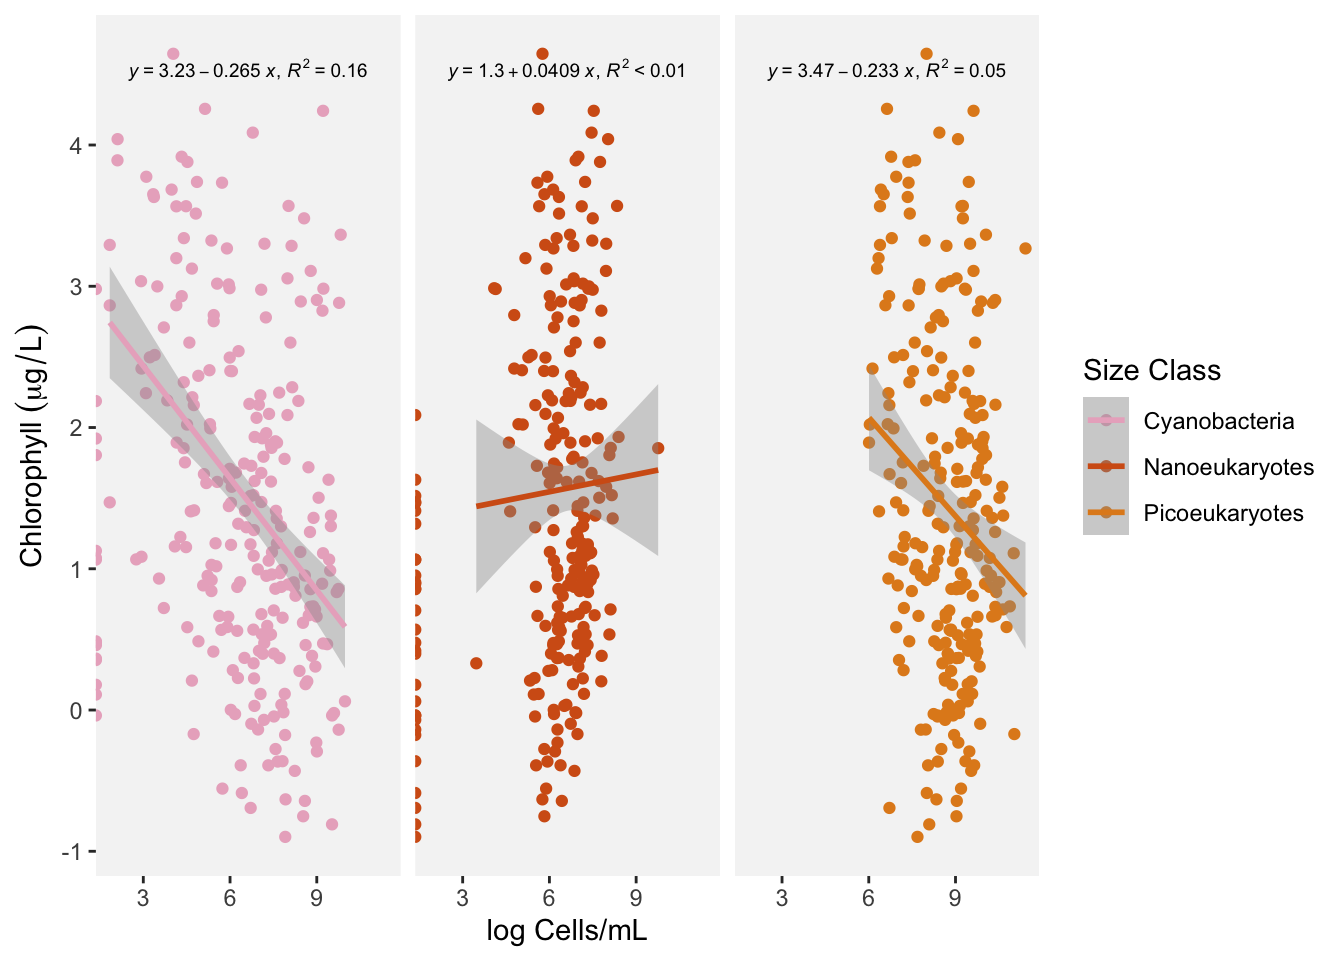

In [ ]:
#Plotting chlorophyll to cell relationship faceted by phytoplankton size class
chl_to_cell<-cell_long %>% 
  filter(date>"2023-05-05") %>% 
  ggplot(data = cell_long %>% filter(Phyto_Size != "tot_cell"), mapping=aes(x=log(Cells_mL), y=log(mean_chl), color=Phyto_Size))+
  geom_point()+
  geom_smooth(method="lm")+
  stat_poly_eq(use_label(c("eq", "R2")),
              color = "black", 
               size = 2.5, 
               label.x = "center", label.y = "top")+
  facet_wrap(~Phyto_Size)+
  scale_color_manual(values=met.brewer("Tara",3, type="discrete"), labels=c("Cyanobacteria","Nanoeukaryotes","Picoeukaryotes"))+
  labs(x="log Cells/mL",y = expression("Chlorophyll "(mu*g/L)), color="Size Class")+
  theme(panel.grid = element_blank(), 
        panel.background=element_rect(fill="grey96"),
        strip.text=element_blank())
chl_to_cell

In [ ]:
# Read in the data
flowcam<-read.csv("notebooks/flowcam_combined_output.csv")
str(flowcam)

'data.frame':   524761 obs. of  74 variables:
 $ Name                   : chr  "Harvey_11April2024_CML_4x" "Harvey_11April2024_CML_4x" "Harvey_11April2024_CML_4x" "Harvey_11April2024_CML_4x" ...
 $ Area..ABD.             : num  215.6 420.1 87.2 40.7 208.9 ...
 $ Area..Filled.          : num  215.6 420.1 87.2 40.7 211.1 ...
 $ Aspect.Ratio           : num  0.649 0.604 0.573 0.633 0.551 ...
 $ Average.Blue           : num  177 170 184 170 174 ...
 $ Average.Green          : num  176 169 183 169 169 ...
 $ Average.Red            : num  173 167 182 168 165 ...
 $ Biovolume..Cylinder.   : num  7747 14281 2606 677 6783 ...
 $ Biovolume..P..Spheroid.: num  1775 4419 434 555 1447 ...
 $ Biovolume..Sphere.     : num  2381 6478 613 195 2271 ...
 $ Calibration.Factor     : num  1.82 1.82 1.82 1.82 1.82 ...
 $ Calibration.Image      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Capture.ID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Capture.X              : int  368 598 589 724 283 447 199 506 459 781 ...
 

To look at the larger size phytoplankton, data from the Flowcam was analyzed. Because there are so many numeric parameters generated by the Flowcam, a Principle Component Analysis (PCA) was run to look at the relative contributions of each parameter to the data distribution (@fig-biplot).

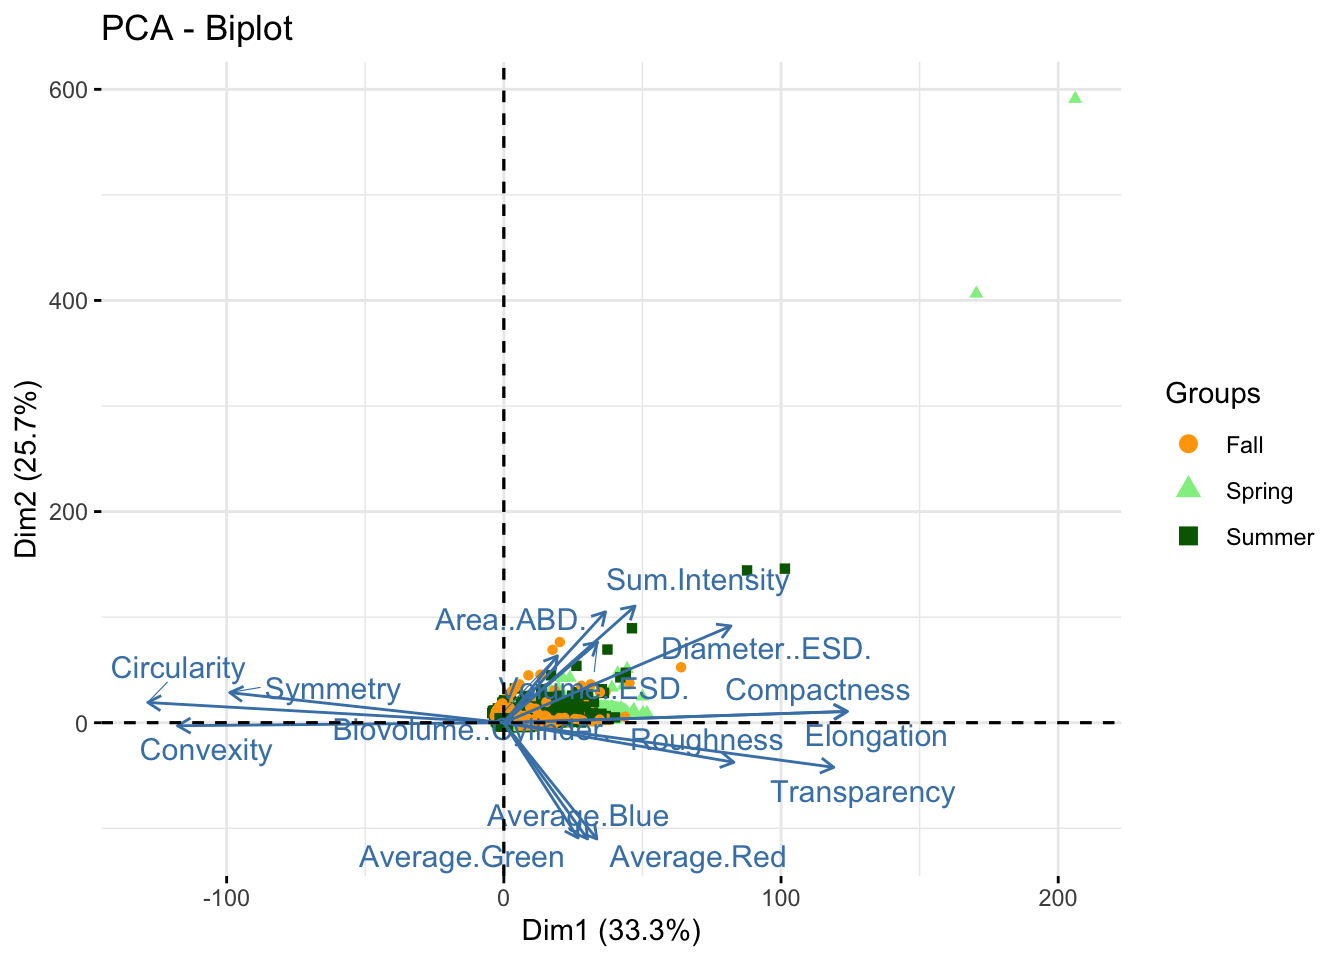

In [ ]:
# Minor reformatting for PCA. Dropping some columns and making sure structure is correct
flowcam_smaller<-flowcam_clean %>% 
  dplyr::select(Identifier, Season, Date, Location, Average.Blue:Volume..ESD.) %>% 
  mutate(across(Identifier:Location, as.factor))

# Running a PCA while retaining relevant qualitative variables (factors in cols 1:4)
morpho_pca <- FactoMineR::PCA(flowcam_smaller, quali.sup = 1:4,
                              graph = FALSE)

# Biplot of PCA, PC1 vs PC2
fviz_pca_biplot(morpho_pca, label="var", habillage=flowcam_smaller$Season, repel=T, 
                palette=c("orange","lightgreen","darkgreen"))

In [ ]:
# Create eig_table
eig_table <- as.data.frame(morpho_pca$eig)

In [ ]:
library(knitr)

# Create table with caption
cute_table <- eig_table %>%
  kable(digits = 4, 
        col.names = c("Eigenvalue", "Percentage of Variance", "Cumulative Percentage of Variance"), 
        caption= "Table 1: Eigenvalues from PCA")  # 

cute_table

  --------------------------------------------------------------------------
            Eigenvalue         Percentage of        Cumulative Percentage of
                                    Variance                        Variance
  ------- ------------ --------------------- -------------------------------
  comp 1        4.9941               33.2941                         33.2941

  comp 2        3.8592               25.7283                         59.0224

  comp 3        2.4863               16.5756                         75.5980

  comp 4        1.1836                7.8908                         83.4888

  comp 5        0.6621                4.4137                         87.9025

  comp 6        0.5589                3.7263                         91.6288

  comp 7        0.4223                2.8152                         94.4440

  comp 8        0.3214                2.1424                         96.5865

  comp 9        0.3070                2.0468                         98.6333

  comp 10       0.0955                0.6367                         99.2700

  comp 11       0.0587                0.3915                         99.6615

  comp 12       0.0385                0.2566                         99.9181

  comp 13       0.0102                0.0679                         99.9860

  comp 14       0.0018                0.0119                         99.9979

  comp 15       0.0003                0.0021                        100.0000
  --------------------------------------------------------------------------

  : Table 1: Eigenvalues from PCA


There were four significant components (eigenvalue \> 1) (Table 1) with PC1 accounting for 33.294% of variation and PC2 accounting for 25.728% of the data. PC3 accounts for another 16.576%, and PC4 7.891%. Circularity, convexity, compactness, elongation, and transparency contributed significantly to PC1, and average blue, green, and red along with area, diameter, and sum intensity were encapsulated in PC2.

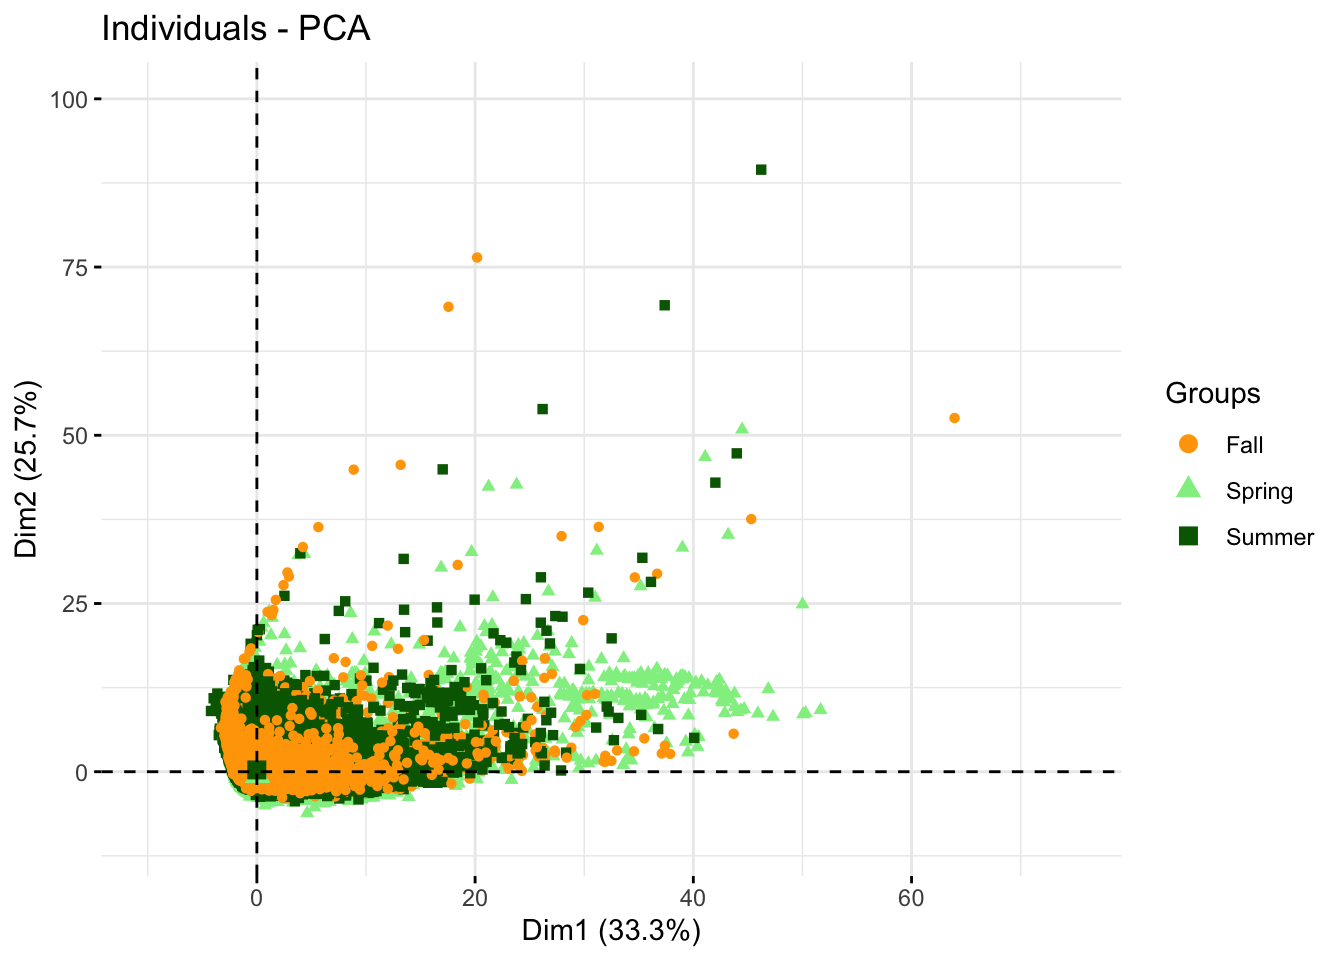

In [ ]:
# Plot of individual points only with reduced axis limits to look at trends
fviz_pca_ind(morpho_pca, label="none", habillage=flowcam_smaller$Season, 
             palette=c("orange","lightgreen","darkgreen"), xlim=c(-10,75), ylim=c(-10,100))

Looking at the individual points from the PCA plot colored by season (@fig-pca-ind), it seems apparent that there is a core group of individuals with common optical characteristics that are present regardless of the season. While there may be some shift in community characteristics, especially during the spring, many of the points not within the main “group” appear to be outliers.

While the PCA was informative for looking at contributions, it was also necessary to look for relationships between parameters in order to reduce correlation in the model (@fig-heatmap). Symmetry, circularity, and convexity are tightly correlated, as are biovolume, area, volume, and diameter. Average red, blue, and green also group, as do compactness and elongation. These groups are highly unsurprising as the methods used to calculate values within groups are derived from the same values.

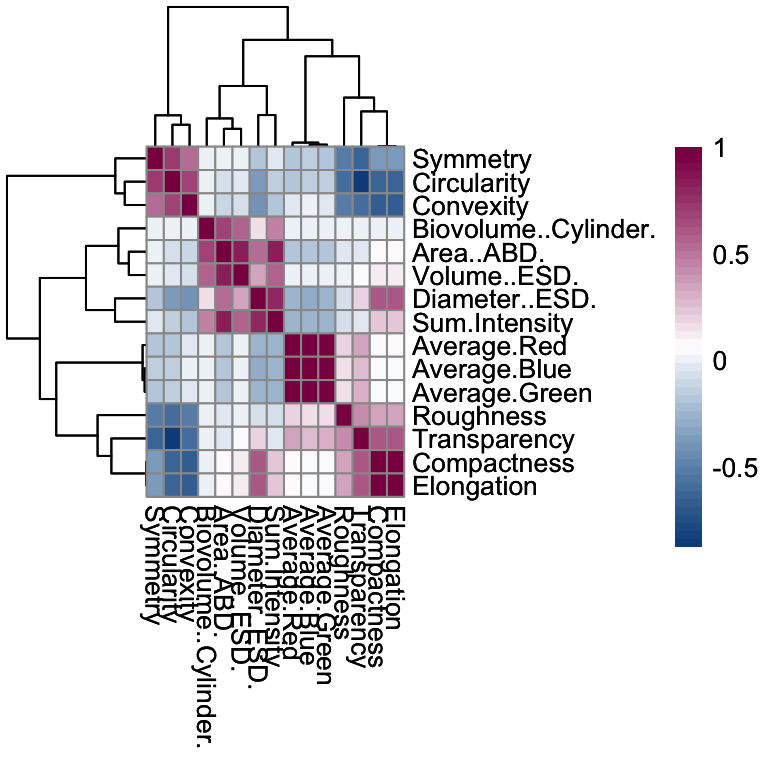

In [ ]:
#Looking more concretely at how we can group variables. 

numeric_data <- flowcam_clean %>% 
  dplyr::select(Average.Blue, Average.Green, Average.Red, Biovolume..Cylinder., Area..ABD., 
         Circularity, Compactness, Convexity, Diameter..ESD., Elongation, Roughness, 
         Sum.Intensity, Symmetry, Transparency, Volume..ESD.)

# Scale the numeric data
scaled_data <- scale(numeric_data)

# Calculate the correlation matrix
corr_matrix <- cor(scaled_data)

# Plot the heatmap and save as png so latex doesn't explode

#png("images/heatmap_output.png", width=800, height=800, res=100)
heatmap<-pheatmap(corr_matrix, 
         cluster_rows = TRUE, 
         cluster_cols = TRUE, 
         display_numbers = F, 
         color = colorRampPalette(c("dodgerblue4", "white", "deeppink4"))(50))
heatmap
#dev.off()

# Include the saved PNG as an image
#knitr:: include_graphics("images/heatmap_output.png")


# Symmetry, circularity, and convexity group
# Biovol, Area, Volume, Diameter Group
# Average red, blue, and green group
# Compactness and elongation group

In [ ]:
# The samples were not necessary scanned the same day they were taken. Eventually I will hopefully have the origin date incorporated from other metadata, but for now I am going to match by week, year, and location. Sorry this is hella bootstrapped. 

# Step 1: Extract Week and Year from Date columns in both datasets
flowcam_clean <- flowcam_clean %>%
  mutate(Week = week(Date), Year = year(Date))

chl_summary <- chl_summary %>%
  mutate(Week = week(date), Year = year(date))

# Step 2: Left join based on Week, Year, and Location
flowcam_with_chl <- left_join(flowcam_clean, chl_summary, by = c("Week", "Year", "Location"="location"))
summary(flowcam_with_chl)

      Date            Location      Mag           Capture.ID    
 Min.   :2023-06-06   CML : 76097   4x:489394   2      :   106  
 1st Qu.:2023-07-05   JEL :448664   4X: 35367   3      :   106  
 Median :2023-08-31   HAMP:     0               4      :   106  
 Mean   :2023-11-01                             5      :   106  
 3rd Qu.:2024-04-21                             6      :   106  
 Max.   :2024-05-08                             7      :   106  
                                                (Other):524125  
  Average.Blue    Average.Green     Average.Red     Biovolume..Cylinder.
 Min.   : 11.79   Min.   : 11.94   Min.   : 12.04   Min.   :6.000e+01   
 1st Qu.:162.26   1st Qu.:160.54   1st Qu.:158.63   1st Qu.:3.180e+03   
 Median :168.18   Median :166.66   Median :164.87   Median :4.789e+03   
 Mean   :167.50   Mean   :165.98   Mean   :164.21   Mean   :1.244e+04   
 3rd Qu.:173.82   3rd Qu.:172.58   3rd Qu.:171.07   3rd Qu.:8.807e+03   
 Max.   :212.14   Max.   :212.24   Max.   

        Date Location Mag Capture.ID Average.Blue Average.Green Average.Red
1 2024-04-11      CML  4x          1     177.4138      175.5034    173.0690
2 2024-04-11      CML  4x          2     169.8276      168.5690    167.4612
3 2024-04-11      CML  4x          3     183.6145      182.7349    181.7831
4 2024-04-11      CML  4x          4     170.4286      168.8367    167.5510
5 2024-04-11      CML  4x          5     173.8099      169.4859    165.0211
6 2024-04-11      CML  4x          6     175.8994      174.7654    173.8212
  Biovolume..Cylinder. Area..ABD. Circularity Compactness Convexity
1            7746.7994   215.5513      0.7816      1.2795    1.0000
2           14281.1482   420.1248      0.8757      1.1419    1.0000
3            2606.3048    87.2012      0.9738      1.0269    1.0000
4             677.0406    40.7108      0.3935      2.5411    0.7424
5            6782.8726   208.9005      0.7599      1.3159    1.0000
6            9104.4015   293.0915      0.7471      1.3385   

Adding missing grouping variables: `Identifier`, `Season`, `Location`
`summarise()` has grouped output by 'Identifier', 'Season'. You can override
using the `.groups` argument.

Building off of the correlation analysis and the vector lengths from the PCA, a generalited linear model with a Gamma distribution and log link was fit for average chlorophyll as a function of average red, circularity, diameter (equivalent spherical), location, and season. The numeric parameters were averaged over location and date in order to simplify the model. The model was further reduced to eliminate non-significant coefficients for an final fit of chlorphyll as a function of diameter, season, and location (Table 2) (AIC=119.89). The chlorophyll at JEL is on average 1.468 ± 0.24 $\mu$g/L (p= \<0.0001) higher than at CML. Spring chlorophyll concentrations are estimated to be 1.069 ± 0.25$\mu$g/L (p= 0.00015) higher than fall, and summer chlorophyll 0.687 ± 0.22$\mu$g/L (p=0.00354). Diameter is estimated to increase by 0.202 ± 0.07$\mu$m (p= 0.00698) for every $\mu$g/L increase in chlorophyll.

In [ ]:
# Creating a tidy table of output
mod_table <- tidy(small_mod2) %>%
  mutate(RowLabel = c("Intercept", "Jackson Estuarine Lab", "Spring", "Summer", "Diameter (ESD)"),
         p_value_formatted = case_when(
           p.value < 0.0001 ~ "<0.0001***",
           p.value < 0.001  ~ paste0(sprintf("%.5f", p.value), "***"),
           p.value < 0.01   ~ paste0(sprintf("%.5f", p.value), "**"),
           p.value < 0.05   ~ paste0(sprintf("%.5f", p.value), "*"),
           TRUE             ~ sprintf("%.5f", p.value)
         )) %>%
  select(RowLabel, estimate, std.error, statistic, p_value_formatted) %>% 
  kable(col.names = c("Term", "Estimate", "Standard Error", "t-Value", "p-Value"),
    caption = "Table 2: Model summary for mean chlorophyll as a function of location, season, and diameter", digits=c(1, 3, 3, 3, 4))
mod_table

  Term                      Estimate   Standard Error   t-Value p-Value
  ----------------------- ---------- ---------------- --------- ----------------
  Intercept                   -4.901            1.741    -2.816 0.00838\*\*
  Jackson Estuarine Lab        1.468            0.245     6.004 \<0.0001\*\*\*
  Spring                       1.069            0.248     4.307 0.00015\*\*\*
  Summer                       0.687            0.217     3.157 0.00354\*\*
  Diameter (ESD)               0.202            0.070     2.889 0.00698\*\*

  : Table 2: Model summary for mean chlorophyll as a function of
  location, season, and diameter


# Discussion

Additionally, @mean-chl makes a compelling argument for considering local chlorophyll concentrations within the Great Bay estuary rather than relying on an average. The highly-estuarine site JEL frequently shows elevated chlorophyll concentrations relative to coastal-adjacent CML, with differences as high a factor of magnitude. CML is also interesting in that its bloom peaks seem to be on average lower than either HAMP or JEL. HAMP also exhibits a fair amount of variability, but its high-est annual concentrations in the available data seem to be the fall blooms in both 2023 and 2024. Fall tends to be a smaller, secondary bloom which is triggered by the increased mix depth due to the breaking up of water column stratification at the end of summer, rather than the spring bloom which is triggered by light and temperature. It would be helpful to examine environmental parameters from these three locations to get a better sense of what physical factors might be driving these changes. It would also be interesting to collect finer resolution chlorophyll concentration data on either a daily-tidal or even hourly timescale.

Another important consideration with the chlorophyll data is that not all of the bulk chlorophyll measured may be coming from a living source. It is possible that the chlorophyll is associated with dead primary producers in detritus which have not broken down enough yet to change the detectable composition of chlorophyll. Future plans for this dataset include adding identification to all particles which will allow us to filter out any non-living individuals from analysis.

For the smaller size classes of phytoplankton, all three size classes also showed high rates of variability on a weekly time scale. Picoeukaryotes had on average the highest overall concentration over the course of the year with peaks in summer and fall, perhaps slightly lagged behind the main chlorophyll peak. Cyanobacteria had their highest relative concentration peak in the middle of winter, perhaps due to some alleviation of competition during the winter lull in overall productivity. Nanoeukaryotes had relatively low concentration compared to the other two groups, but this may be partially due to a sampling artifact as they tend to fall on the lower end of detection size-wise. While these comparisons may be interesting, there was unfortunately no correlation between the small cells and chlorophyll either broken down by location ($\text{R}^2$ = 0.05 for both) or by size class ($\text{R}^2$ = 0.16, \<0.01, and 0.05 for cyanobacteria, nanoeukaryotes, and picoeukaryotes, respectively). This shows that any signal due to the smaller cells is likely being swamped by blooms of larger individuals like diatoms. Again, future identification of particles and cross-reference between Flowcam and flow cytometer data will better elucidate this relationship.

The preliminary analysis of parameter relationships was fairly unsurprising, with lots of correlations signifying it will likely be easy to reduce the amount of variables necessary for an effective model. Similar parameters tended to be calculated with some unifying calculation (e.g., color, describing circle-based measurements, measures of area/diameter). The most interesting part of the PCA actually turned out to be the pattern of the individual data points and how they group on PC1 vs. PC2 (@fig-pca-ind). It appears as though there is a core grouping around the (0,0) which does not change seasonally. This again may be due to characteristics of detritus in the water rather than living phytoplankton, so this figure will be interesting to revisit after creating a classification filter. There does visually appear to be differences between seasons which may intensify after removing detritus.

Due to complications with the model, the data was simplified by averaging characteristics and modeled as mean bulk chlorophyll as a function of location, season, and diameter. Model fitting procedure showed that when averaged, mean diameter was the only imaging parameter (from the reduced subset chosen to test) that had any significance. This could possibly be due to that core grouping of individuals around the origin in the individual PCA plot; the weight of the core “blob” could be outweighing outliers (potentially the larger, living phytoplankton). The fact that season and location were significant factors was unsurprising judging by the visual assessment of data distribution. It will be extremely interesting to see what happens with a more complex model, hopefully one with a random effect for date-location and better accounting for multiple-sampling.

# Conclusion

This preliminary exploration of phytoplankton community composition data in the Great Bay shows several important things to consider in future analysis. First, small size phytoplankton, while ecologically interesting, do not contribute significantly to bulk chlorophyll measurements, meaning that they can be ignored in models for now. Second, there appears to be a core grouping of particle images from the Flowcam which, when averaged, swamp statistical differences in imaging parameters from “outliers”. If this group is indeed detrital, classification and filtering of these particles is essential for better modeling the relationship between particle images and chlorophyll. Overall, this analysis emphasizes the need for classification in high throughput imaging studies in order to handle non-target particles.

#Works Cited